# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [256]:
import numpy
data_train = numpy.loadtxt('train.txt', delimiter=',')
data_test = numpy.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [257]:
X_train = data_train[:,0]
y_train = data_train[:,1]

#провел аналогичные действия с тестовыми данными
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [258]:
temp = []
for elem in X_train:
    temp.append([1, elem]);

temp_matrix = numpy.matrix(temp)
#создал матрицу для уравнений y = kx + b
my_matr = numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(temp_matrix),
                    temp_matrix)
            ),
        numpy.transpose(temp_matrix)),
    y_train)

print(
    numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(temp_matrix),
                    temp_matrix)
            ),
        numpy.transpose(temp_matrix)),
    y_train))

[[4.43323091 2.2791345 ]]


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

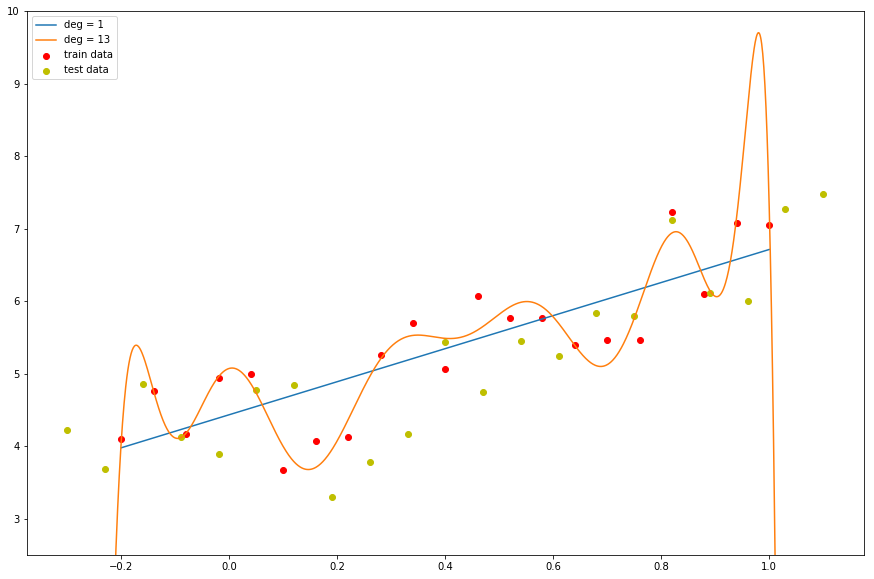

In [259]:
import matplotlib.pyplot
import numpy

#matplotlib.pyplot.figure(figsize=(10, 10))

matplotlib.pyplot.figure(figsize=(15, 10))
matplotlib.pyplot.ylim(2.5, 10)

'''
for line in data_train:
    matplotlib.pyplot.scatter(line[0], line[1])

x = []
y = []
'''

x = []
y = []
for line in data_train:
    x.append(line[0])
    y.append(line[1])
matplotlib.pyplot.scatter(x, y, c = 'r' , label = "train data")
x = []
y = []
for line in data_test:
    x.append(line[0])
    y.append(line[1])
matplotlib.pyplot.scatter(x, y, c = 'y' , label = "test data")
x = []
y = []

#проходимся по всем точкам в X_train
for elem in X_train:
    x.append(elem)
    y.append(my_matr[0, 1] * elem + my_matr[0, 0])

local_train = 0; local_test = 0

for i in range(0, 21):
    local_train = local_train + (y[i] - y_train[i]) ** 2
    local_test = local_test + (y[i] - y_test[i]) ** 2

#два листа для вычисления среднеквадратичной ошибки
train_err = []; test_err = []

train_err.append(local_train / 21)
test_err.append(local_test / 21)

matplotlib.pyplot.plot(x, y, label = "deg = 1")

n = 14
X = numpy.column_stack((X_train, numpy.ones(len(X_train))))
for i in range (2, n):
    X = numpy.column_stack((X_train ** i, X))
a = numpy.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
x = numpy.arange(-0.25, 1.05, 0.001)
z = a[n-1];
for i in range (1, n):
    z += a[i - 1] * x ** (n - i)
out = matplotlib.pyplot.plot(x, z, label = "deg = 13")


matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.show()

###### Сейчас я думаю, что в зависимости от степени многочлена, получаем лучшее приближение графика (то есть, чем больше степень многочлена, тем лучшее приближение мы получаем). Хотя при этом получаем оптимальную степень 13, при большей получаем ошибку более большую.

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

#### Шаги действий:
1) начертим на графике наши точки из изначально полученных данных  
2) будем создавать на каждом проходе цикла новый лист с x в степени i по строкам  
3) далее переводим наш лист в матрицу  
4) транспонируем его  
5) соеденяем получившийся столбец с матрицей temp_matrix  
6) получаем "loc" в виде листа коэффицентов для x в каждой степени  
7) далее находим значение функции в каждой точке x из входных данных  
8) считаем квадратичную ошибку  

koef for k = 2: [[4.4724765  1.15783169 1.40162851]]
koef for k = 3: [[ 4.46073636  1.06501611  1.85975084 -0.3817686 ]]
koef for k = 4: [[  4.34116612   1.17180239   6.79409178 -13.05132812   7.9184747 ]]
koef for k = 5: [[  4.43129781  -0.13059804   3.2747144   21.37479628 -51.13148139
   29.52497804]]
koef for k = 6: [[   4.38379501   -4.59717933   16.00290399  121.25709713 -481.51013289
   581.45329824 -229.97013342]]
koef for k = 7: [[   4.44451271   -4.0088959     7.21545856  119.35078432 -314.23117235
   122.87821664  238.69936825 -167.38196489]]
koef for k = 8: [[ 4.66378911e+00 -5.18277343e+00 -2.66956324e+01  2.68860444e+02
   1.09895678e+02 -3.13285647e+03  6.76062861e+03 -5.70171031e+03
   1.72947761e+03]]
koef for k = 9: [[    4.64588345    -4.55270547   -24.26271662   219.0420538
    176.24539963 -2441.96292187  3913.26898388 -1216.4495597
  -1522.09730043   903.21524152]]
koef for k = 10: [[ 4.66916980e+00 -2.15979687e+00 -3.61751923e+01  4.49347033e+01
   1.20195353e+03

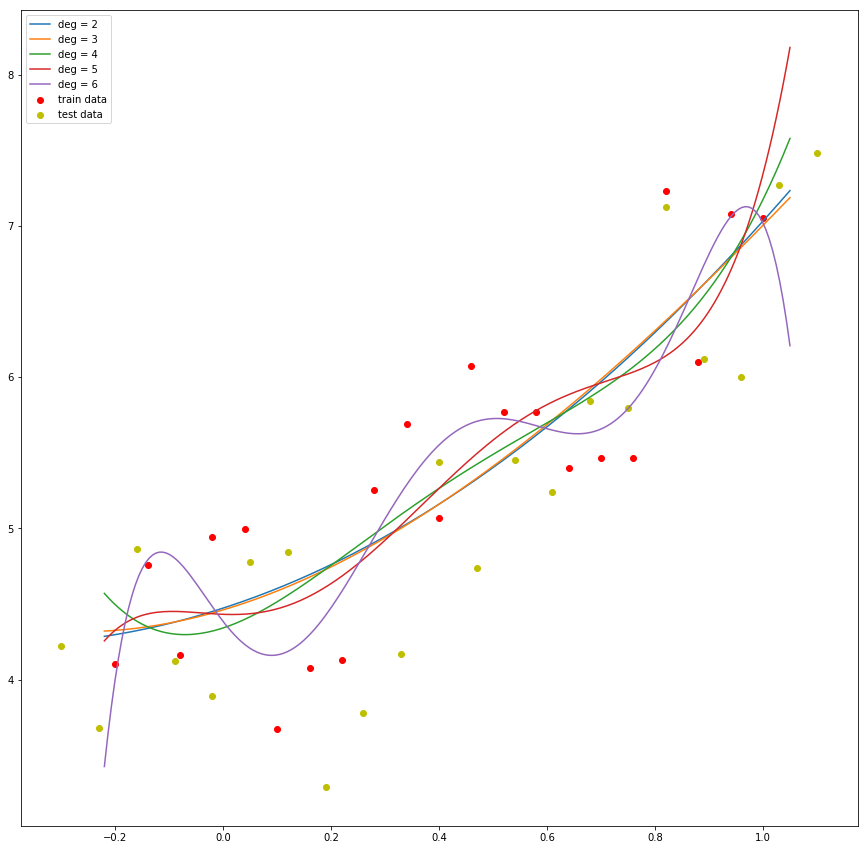

In [260]:
matplotlib.pyplot.figure(figsize=(15, 15))

# пункт 1
'''for line in data_train:
    matplotlib.pyplot.scatter(line[0], line[1])
'''

x = []
y = []
for line in data_train:
    x.append(line[0])
    y.append(line[1])

matplotlib.pyplot.scatter(x, y, c = 'r' , label = "train data")
x = []
y = []
for line in data_test:
    x.append(line[0])
    y.append(line[1])
matplotlib.pyplot.scatter(x, y, c = 'y' , label = "test data")

# пункт 2
#for i in range(2, 11):
for i in range(2, 11):
    temp_list = []; c = 0
    for elem in X_train:
        temp_list.append([])
        temp_list[c].append(elem ** i)
        c = c + 1

    #пункт 3, 4, 5
    temp_matrix_2 = numpy.matrix(temp_list)
    temp_matrix = numpy.concatenate((temp_matrix, temp_matrix_2), axis = 1)
    
    # пункт 6
    loc = numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(
                        temp_matrix),
                        temp_matrix)),
            numpy.transpose(temp_matrix)),
        y_train)
    
    print("koef for k = ", i, ": ", loc, sep="")
    
    x = []; y = []
    y_t = []
    y_n = []
    #пункт 7
    '''for elem in X_train:
        x.append(elem)
        l = 0
        for j in range(0, i + 1):
            l = l + loc[0, j] * (elem ** j)
        y.append(l)
    matplotlib.pyplot.plot(x, y)
    
    x_22 = []; y_22 = []
    for elem in X_test:
        x_22.append(elem)
        l_22 = 0
        for j in range(0, i + 1):
            l_22 = l_22 + loc[0, j] * (elem ** j)
        y_22.append(l_22)'''
    
    for x_ in X_train:
        temp = 0
        for j in range(0, i + 1):
            temp += loc[0, j]*(x_**j)
        y_n.append(temp)
    #нахожу значения нашей функции в 200 точках, чтобы сделать график более гладким
    x_x = numpy.linspace(-0.22,1.05,200)
    for x_ in x_x:
        x.append(x_)
        temp = 0
        for j in range(0, i + 1):
            temp += loc[0, j]*(x_**j)
        y.append(temp)
    if i < 7 :
        st = "deg = " + str(i)
        matplotlib.pyplot.plot(x, y, label = str(st))
        i = int(i)
    #Найду значения у нашей функции в тестовых данных
    for x_ in X_test:
        temp = 0
        for j in range(0, i + 1):
            temp += loc[0, j]*(x_**j)
        y_t.append(temp)
        
    #пункт 8
    train_t = 0; test_t = 0
    for j in range(0, 21):
        train_t = train_t + (y[j] - y_train[j]) ** 2
        test_t = test_t + (y_22[j] - y_test[j]) ** 2
    train_err.append(train_t / 21)
    test_err.append(test_t / 21)

print()
for i in range(0, 10):
    print("for k = ", i + 1, " we have:", sep="")
    print("\ttrain mistake = ", train_err[i] , sep="")
    print("\ttest mistake = ", test_err[i], sep="")

matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

##### Можно заметить такой факт, что с k=6 "train mistake" начинает слегка увеличиваться, но потом немного уменьшается и остается на примерно одном уровне. То есть мы может нормально приблизить нашу функцию на тренировочных данных, но на других входных данных мы получаем большее отклонение, так как они "зашумленны". Получается, что бы наблюдаем как таковое "переобучение" нашей модели, о котором было сказано в теории выше.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [261]:
#"price"	"totsp"	"livesp"	"kitsp"	"dist"	"metrdist"
flats = numpy.loadtxt('flats_moscow_mod.txt', delimiter='\t')

prices = []; data_array = []
# Мы хотим построить такую матрицу,
# где в первом столбце у нас будут все данных по totsp, а во втором livesp и тд.
# Для реализации этого, мы сначала мы заносим все в data_array по строчкам
# Потом транпонируем и получаем нужное

for i in range(6):
    data_array.append([])

for i in range(2040):
    prices.append(flats[i, 0])
    for j in range(5):
        data_array[j].append(flats[i, j + 1])
    data_array[5].append(1)

# Переводим наш лист в матрицу, и транспонируем ее.
# Сейчас все данные записаны как в первом комментарии по столбцам, кроме price  -  он отдельно

X = numpy.matrix(data_array)
X = numpy.transpose(X)

# Таким же образом мы записали все цены в строку и транспонировли в столбец

Y = numpy.matrix(prices)
Y = numpy.transpose(Y)
a = numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(X),
                    X)),
            numpy.transpose(X)),
    Y)

# Теперь нужно посчитать среднеквадратическую ошибку
# Воспользуюемся формулой

err = 0

for i in range(2040):
    temp = 0
    for j in range(5):
        # Умножаю число из каждого столбца на ее коэффицент из а-матрицы
        temp = temp + a[j, 0] * data_array[j][i]
    # потом суммируем все одну переменную
    # а в конце делим ее на количество слагаемых
    err = err + (temp - prices[i]) ** 2

err = err / 2040

print("Now we have:\n\tMatrix with column of 1:\n\t\terror = ", err, sep="")
print ("\tkoef for:")
print("\t\ttotspace is", a[0, 0],
      "\n\t\tlivespace is", a[1, 0],
      "\n\t\tkitspace is", a[2, 0], 
      "\n\t\tdist is", a[3, 0],
      "\n\t\tmdist is", a[4, 0],
      "\n")

#Я не очень понял, нужно ли мне добавлять столбец еденичек, поэтому запускаю еще и без него такую же матрицу

prices = []; data_array = []

for i in range(5):
    data_array.append([])

for i in range(2040):
    prices.append(flats[i,0])
    for j in range(5):
        data_array[j].append(flats[i,j+1])

X = numpy.matrix(data_array)
X = numpy.transpose(X)
Y = numpy.matrix(prices)
Y = numpy.transpose(Y)
a = numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(X),
                    X)),
            numpy.transpose(X)),
    Y)

# Теперь нужно посчитать среднеквадратическую ошибку
# Воспользуюемся формулой

err = 0
for i in range(2040):
    temp = 0
    for j in range(5):
        # Умножаю число из каждого столбца на ее коэффицент из а-матрицы
        temp = temp + a[j, 0] * data_array[j][i]
    # потом суммируем все одну переменную
    # а в конце делим ее на количество слагаемых
    err = err + (temp - prices[i]) ** 2

err = err / 2040

print("\tMatrix without column of 1:\n\t\terror = ", err, sep="")
print ("\tkoef for:")
print("\t\ttotspace is", a[0, 0],
      "\n\t\tlivespace is", a[1, 0],
      "\n\t\tkitspace is", a[2, 0], 
      "\n\t\tdist is", a[3, 0],
      "\n\t\tmdist is", a[4, 0])

Now we have:
	Matrix with column of 1:
		error = 1641.6739707416725
	koef for:
		totspace is 1.4870528861258723 
		livespace is 1.6562890012269091 
		kitspace is 1.8192049792747527 
		dist is -3.3271540562740576 
		mdist is -1.3156886037015727 

	Matrix without column of 1:
		error = 935.7887456487869
	koef for:
		totspace is 1.554784070005632 
		livespace is 1.1740233040193317 
		kitspace is 1.758058196784951 
		dist is -3.9168121964687064 
		mdist is -1.551382456399667


По коэфициентам, полученными в этой модели, можно сказать, что цена квартиры положительно зависит от всех площадей - т.е чем больше площадь квартиры + кухни + жилой области, тем больше цена. И отрицательно зависит от расстояния от метро и еще больше от расстояния от центра городаб т.е. чем дальше мы от центра и от метро, тем дешевле квартира. В принципе, звучит довольно логично - чем ближе к центру города, тем всегда дороже квартиры, то же самое и с метро.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [262]:
import numpy.random as rand

X_train = []; X_test = []; Y_train = []; Y_test = []

# Я взял рандомно много элементов для тестовой и тренировочной выборки через numpy.random

test_index = numpy.random.randint(0, 2040, 500)
train_index = numpy.random.randint(0, 2040, 500)
prices_test = []; data_array_test = []; prices_train = []; data_array_train = []

# Теперь посмотрим,
# что будет с ошибкой, если везде будут квадрты

for i in range(5):
    data_array_test.append([])
    data_array_train.append([])

for i in test_index:
    prices_test.append(flats[i, 0])
    
    for j in range(5):
        data_array_test[j].append(flats[i, j + 1] ** 2)

for i in train_index:
    prices_train.append(flats[i, 0])
    for j in range(5):
        data_array_train[j].append(flats[i, j + 1] ** 2)

X_train = numpy.matrix(data_array_train)
X_train = numpy.transpose(X_train)
Y_train = numpy.matrix(prices_train)
Y_train = numpy.transpose(Y_train)
X_test = numpy.matrix(data_array_test)
X_test = numpy.transpose(X_test)
Y_test = numpy.matrix(prices_test)
Y_test = numpy.transpose(Y_test)

a_squares_train = numpy.dot(
                      numpy.dot(
                          numpy.linalg.inv(
                              numpy.dot(
                                  numpy.transpose(X_train),
                                  X_train)),
                          numpy.transpose(X_train)),
    Y_train)

err_test = 0; err_train = 0

for i in range(500):
    temp_test = 0; temp_train = 0
    
    for j in range(5):
        temp_test = temp_test + a_squares_train[j, 0] * X_test[i, j]
        temp_train = temp_train + a_squares_train[j, 0] * X_train[i, j]
    err_test = err_test + (temp_test - Y_test[i, 0]) ** 2
    err_train = err_train + (temp_train - Y_train[i, 0]) ** 2

err_test = err_test / 500
err_train = err_train / 500

print("err_train with squares:", err_train)
print("err_test with squares:", err_test)

err_train with squares: 1075.8381197086867
err_test with squares: 1142.6223393847995


In [263]:
from math import log

data_array_different_train = []; data_array_different_test = []

for i in range(4):
    data_array_different_train.append([])
    data_array_different_test.append([])

for i in test_index:
    data_array_different_test[0].append(log(flats[i, 1]))
    data_array_different_test[1].append(0.6 * flats[i, 1] + 0.3 * flats[i, 2] + 0.3 * (flats[i, 3]))
    data_array_different_test[2].append(flats[i, 4] ** 0.5 + log(flats[i, 5]))
    data_array_different_test[3].append(1)

for i in train_index:
    data_array_different_train[0].append(log(flats[i, 1]))
    data_array_different_train[1].append(0.6 * flats[i, 1] + 0.3 * flats[i, 2] + 0.3 * (flats[i, 3]))
    data_array_different_train[2].append(flats[i, 4] ** 0.5 + log(flats[i, 5]))
    data_array_different_train[3].append(1)

X_train = numpy.matrix(data_array_different_train)
X_train = numpy.transpose(X_train)
X_test = numpy.matrix(data_array_different_test)
X_test = numpy.transpose(X_test)

a_squares = numpy.dot(
                numpy.dot(
                    numpy.linalg.inv(
                        numpy.dot(
                            numpy.transpose(X_train),
                            X_train)),
                    numpy.transpose(X_train)),
    Y_train)

err_test = 0; err_train = 0

for i in range(500):
    temp_test = 0; temp_train = 0

    for j in range(4):
        temp_test = temp_test + a_squares[j, 0] * X_test[i, j]
        temp_train = temp_train + a_squares[j, 0] * X_train[i, j]
    err_test = err_test + (temp_test - Y_test[i, 0]) ** 2
    err_train = err_train + (temp_train - Y_train[i, 0]) ** 2
err_test = err_test / 500
err_train = err_train / 500

print("err_train with different things", err_train)
print("err_test with different things", err_test)

err_train with different things 737.2005480527068
err_test with different things 826.405228116137


#### Я построил две модел, при это вторая вышла лучше. То есть на тестовых данных мы получили ошибку меньше меньше, чем на тренировочных.

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

Now we have: 
	det without regularization = 9.082864838378161e-12
	det with regularization = 1020.8333384200779
ошибка на тренировочных данных у обычной модели   0.18829348988370612
ошибка модели с регуляризацией на тестовых данных 0.30662597053860274
в то время как ошибка на тестовых у обычной       0.481340103199419


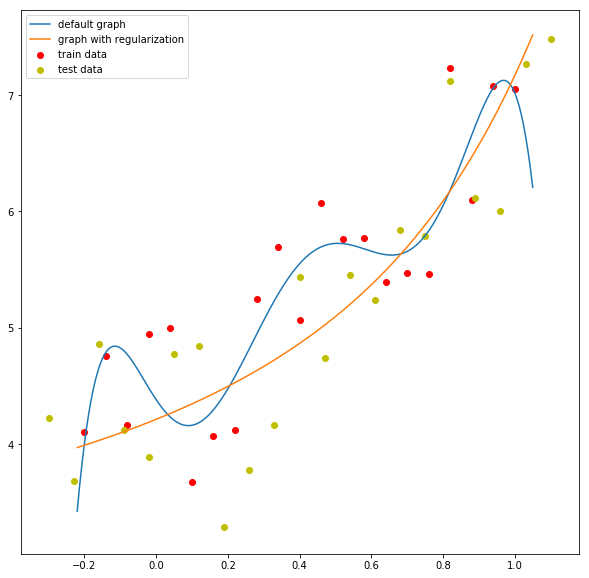

In [264]:
matplotlib.pyplot.figure(figsize=(10, 10))

# извлекаем x и y из входных данных
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]


x = []
y = []
for line in data_train:
    x.append(line[0])
    y.append(line[1])
matplotlib.pyplot.scatter(x, y, c = 'r' , label = "train data")
x = []
y = []
for line in data_test:
    x.append(line[0])
    y.append(line[1])
matplotlib.pyplot.scatter(x, y, c = 'y' , label = "test data")

local = []
for elem in X_train:
    local.append([1, elem])
x_matrix = numpy.matrix(local)

for i in range(2, 7):
    temp = []; c = 0
    for elem in X_train:
        temp.append([])
        temp[c].append(elem ** i)
        c = c + 1
    temp_m = numpy.matrix(temp) 
    x_matrix = numpy.concatenate((x_matrix, temp_m), axis=1)

matrix_without_regularization = numpy.dot(
        numpy.dot(
            numpy.linalg.inv(
                numpy.dot(
                    numpy.transpose(x_matrix),
                    x_matrix)),
            numpy.transpose(x_matrix)),
    y_train)
# матрциа matrix_without_regularization - это матрица без регуляризации

# но сейчас подберем лучшую матрицу для уменьшения ошибки на тестовых данных
alpha = 1.16
matrix_E = numpy.identity(7)
matrix_with_regularization = numpy.dot(
             numpy.dot(
                 numpy.linalg.inv(
                     numpy.dot(
                         numpy.transpose(x_matrix),
                         x_matrix) + alpha * matrix_E),
                 numpy.transpose(x_matrix)),
    y_train)
# в ходе подбора коэфицентов из отрезка [-2; 2], нашел, вроде, самое оптимальное
print("Now we have: ")
print('\tdet without regularization = ',
      numpy.linalg.det(
          numpy.dot(
              numpy.transpose(x_matrix),
              x_matrix)),
      sep="")
print('\tdet with regularization = ',
      numpy.linalg.det(
          numpy.dot(
              numpy.transpose(x_matrix),
              x_matrix) + alpha * matrix_E),
      sep="")

'''x = []; y = []; y_better = []


for elem in X_train:
    x.append(elem)
    temp = 0; temp_better = 0
    
    for j in range(0, 7):
        temp = temp + matrix_without_regularization[0, j] * (elem ** j)
        temp_better = temp_better + matrix_with_regularization[0, j] * (elem ** j)
    y.append(temp)
    y_better.append(temp_better)

matplotlib.pyplot.plot(x, y, label = "default graph")
matplotlib.pyplot.plot(x, y_better, label = "graph with regularization")'''

y = []
x = []
y_good = []
for x_ in X_train:
    temp = 0
    temp_good = 0
    for j in range(0, 7):
        temp += matrix_without_regularization[0, j]*(x_**j)
        temp_good += matrix_with_regularization[0, j]*(x_**j)
    y.append(temp)
    y_good.append(temp_good)
#в этой части считаю значения в 200 точках для двух моих многочленов
y_for_graph = []
y_for_graph_good = []
x_x = numpy.linspace(-0.22,1.05,200)
for x_ in x_x:
    x.append(x_)
    temp = 0
    temp_good = 0
    for j in range(0, 7):
        temp += matrix_without_regularization[0, j]*(x_**j)
        temp_good += matrix_with_regularization[0, j]*(x_**j)
    y_for_graph.append(temp)
    y_for_graph_good.append(temp_good)
matplotlib.pyplot.plot(x, y_for_graph, label = "default graph")
matplotlib.pyplot.plot(x, y_for_graph_good, label = "graph with regularization")

#Посчитаю среднеквадратичную ошибку для обычной модели на тренирвочных и тествоых данных, и для новой модели на тестовых
test = 0; train = 0; test_default = 0

for j in range(0, 21):
    test = test + (y_better[j] - y_test[j]) ** 2
    train = train + (y[j] - y_train[j]) ** 2
    test_default = test_default + (y[j] - y_test[j]) ** 2 

print('ошибка на тренировочных данных у обычной модели  ', train / 21)
print('ошибка модели с регуляризацией на тестовых данных', test / 21)
print('в то время как ошибка на тестовых у обычной      ', test_default / 21)

matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.show()

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

#### Мы можем заметить, что ошибка на тестовых данных уменьшилась, и при этом график модели с регуляризацией (он тут оранжевый) более пологий и плавный, при этом мы можем сказать, что он гораздо меньше подстраивается под тренировочные данные, которые заданы с какими-то погрешностями, и у него снижается эффект "переобуения". Получаем, что модель, обученная только на тренировочных данных имеет большие отклонения, когда модель с регуляризацией лучше показывает основную тенденцию, не отклонясь настолько сильно.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [265]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

SyntaxError: invalid syntax (<ipython-input-265-5da8dba117bd>, line 25)

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.